In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from datetime import date
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

## Read The Dataset

In [2]:
#read the data
data_path = 'marketing_campaign_t.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (2240, 29)


## Data Investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#To remove the NA values
df = df.dropna()
print("Number of sampels after removing:", len(df))

Number of sampels after removing: 2216


In [8]:
df_copy = df.copy()
print(f'Before : {len(df_copy)}')
df_copy.drop_duplicates(keep = False, inplace = True)
print(f'After : {len(df_copy)}') # no duplicates

Before : 2216
After : 2216


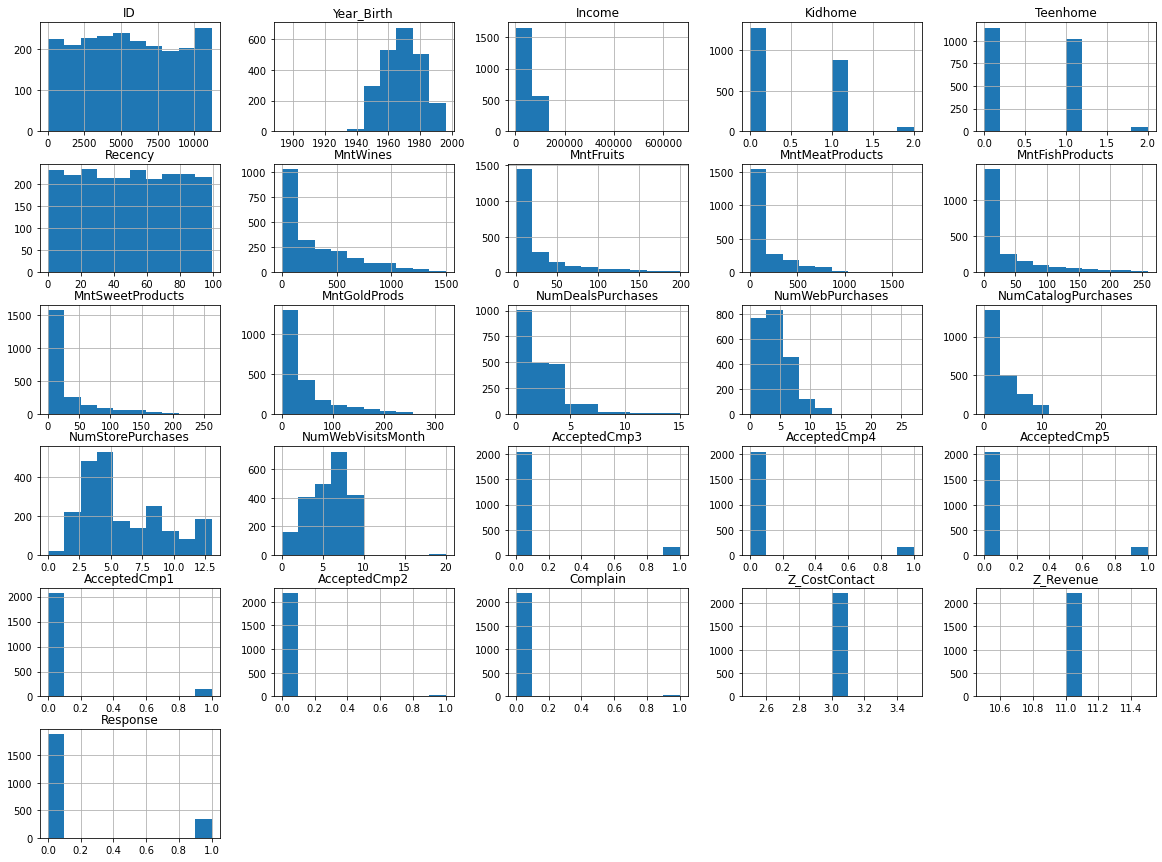

In [9]:
# test
df_copy.hist(figsize=(20,15))
plt.show()

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

## Feature Engineering

In [12]:
#Age of customer today 
df["Age"] = date.today().year-df["Year_Birth"]

df['Num_Accepted_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']+ df['Response']

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [13]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID","Children","Living_With",
          'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response',
           'Kidhome','Teenhome',"Z_CostContact", "Z_Revenue",'Complain']

df = df.drop(to_drop, axis=1)

In [14]:
df['Num_Accepted_Cmp'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [15]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of df-points after removing the outliers are:", len(df))

The total number of df-points after removing the outliers are: 2212


In [16]:
len(df.columns)

19

In [17]:
#Get list of categorical variables
categ_features = (df.dtypes == 'object')
object_cols = list(categ_features[categ_features].index)

print("Categorical variables in the dfset:", object_cols)

Categorical variables in the dfset: ['Education']


In [18]:
le =  LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(le.fit_transform)

print("All features are now numerical")

All features are now numerical


In [19]:
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


## Before Applying PCA

In [20]:
def plot_Clusters(df,f1,f2,labels_, only_clustered = False):
    plt.clf()
    clusters = np.unique(labels_)
    colors = ['r','g','c','m','y','k','#222222','#22FFF2','#24AAA2','#22FF22','grey']
    for c in clusters:   
        if(only_clustered):
            if (c==-1):
                continue
        c_label = 'Noise' if (c==-1) else f'cluster {c}'
        plt.scatter(df[labels_==c][f1], df[labels_==c][f2],c=colors[c],label=c_label)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title('Plot Using Only 2 Features')
    plt.legend()

In [21]:
scaled_df

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Num_Accepted_Cmp,Spent,Family_Size,Is_Parent
0,-0.893586,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,0.617244,1.676245,-1.758359,-1.581139
1,-0.893586,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.502808,-0.963297,0.449070,0.632456
2,-0.893586,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,-0.502808,0.280110,-0.654644,-1.581139
3,-0.893586,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.502808,-0.920135,0.449070,0.632456
4,0.571657,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.502808,-0.307562,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,0.163575,-0.502808,1.218061,0.449070,0.632456
2208,0.571657,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,1.958607,0.617244,-0.271040,2.656499,0.632456
2209,-0.893586,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-1.033114,0.617244,1.052052,-1.758359,-1.581139
2210,0.571657,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,1.103830,-0.502808,0.391336,0.449070,0.632456


## Hierarchical

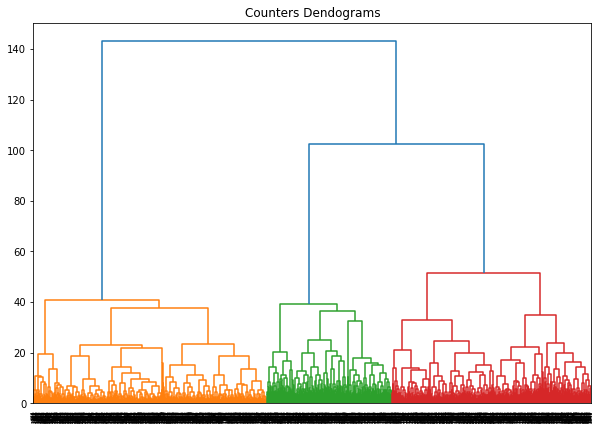

In [22]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=scaled_df , method='ward',metric='euclidean'))

In [23]:
model_H = AgglomerativeClustering(n_clusters=3)
model_H = model_H.fit(scaled_df)
labels_H = model_H.labels_

In [24]:
ss_H =silhouette_score(scaled_df, labels_H)
print(f'Silhouette_Score Of Hierarchical : {ss_H}')
Without_PCA_SS ={}
Without_PCA_SS['Hierarchical']=ss_H

Silhouette_Score Of Hierarchical : 0.19636103941411914


Text(0, 0.5, 'Spent')

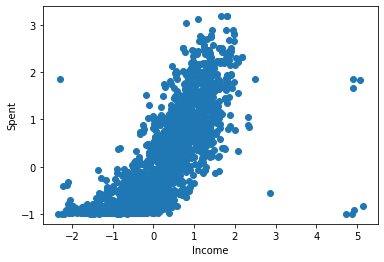

In [25]:
F1 = 'Income'
F2 = 'Spent'
X = scaled_df[[F1,F2]]
plt.scatter(X[F1], X[F2])
plt.xlabel(F1)
plt.ylabel(F2)

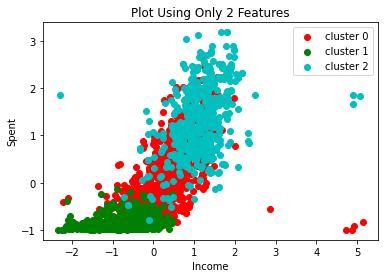

In [26]:
plot_Clusters(X,F1,F2,labels_H,True)

## Kmeans

In [27]:
def plot_elbow(d,K_range=range(1, 10)): 
    distortions = []
    K = range(1, 10)
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(d)
        kmeanModel.fit(d)
        distortions.append(kmeanModel.inertia_)

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

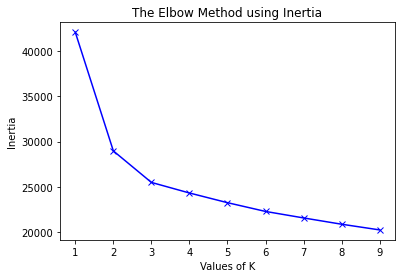

In [28]:
plot_elbow(scaled_df)

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
Km_labels = kmeans.labels_

In [30]:
ss_kmeans = silhouette_score(scaled_df, Km_labels)
print(f'Silhouette_Score Of Kmeans : {ss_kmeans}')
Without_PCA_SS['Kmeans']=ss_kmeans

Silhouette_Score Of Kmeans : 0.22876818656371703


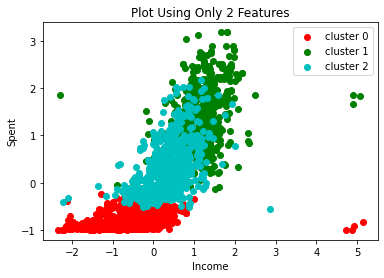

In [31]:
plot_Clusters(X,F1,F2,Km_labels,True)

## GMM

In [32]:
gm = GaussianMixture(n_components=3, random_state=0).fit(scaled_df)
gm_labels = gm.predict(scaled_df)
gm_labels

array([0, 1, 0, ..., 0, 2, 2], dtype=int64)

Silhouette_Score Of GMM : 0.14829833910678059


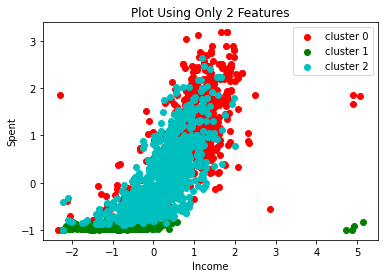

In [33]:
ss_df_gmm =silhouette_score(scaled_df, gm_labels)
print(f'Silhouette_Score Of GMM : {ss_df_gmm}')
plot_Clusters(scaled_df,F1,F2,gm_labels,True)
Without_PCA_SS['GMM']=ss_df_gmm

In [34]:
# dbscan and plot
ss_dbscan_dict={}
for n in np.arange(0.25,12,0.25):
    clustering = DBSCAN(eps=n, min_samples=6).fit(scaled_df)
    labels_db = clustering.labels_
    if(len(set(labels_db))>2):
        ss =silhouette_score(scaled_df, labels_db)
        ss_dbscan_dict[n]=ss

In [35]:
ss_dbscan_dict

{0.75: -0.2308527370992842,
 1.0: -0.18089644519820972,
 1.25: -0.1644534303805282,
 1.5: 0.008817559852565151,
 1.75: -0.02538709482226697,
 2.0: 0.13219063367532105,
 2.25: -0.004368535019730297,
 2.5: 0.21945412704441358,
 2.75: 0.13283740508779984,
 3.25: 0.26372633915011423}

In [36]:
clustering = DBSCAN(eps=3.25, min_samples=6).fit(scaled_df)
labels_dbscan = clustering.labels_
values, counts = np.unique(labels_dbscan, return_counts=True)
print(values)
print(counts)
ss_db =silhouette_score(scaled_df, labels_dbscan)
print(f'Silhouette_Score Of DBSCAN : {ss_db}')

[-1  0  1]
[ 231 1976    5]
Silhouette_Score Of DBSCAN : 0.26372633915011423


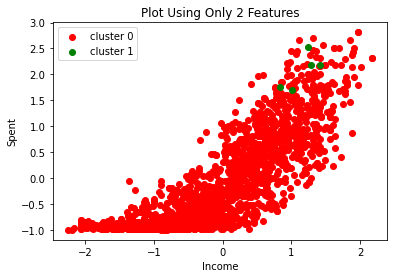

In [37]:
plot_Clusters(X,F1,F2,labels_dbscan,True)

In [38]:
Without_PCA_SS

{'Hierarchical': 0.19636103941411914,
 'Kmeans': 0.22876818656371703,
 'GMM': 0.14829833910678059}

## Applying PCA

In [39]:
pca = PCA()
pca.fit(scaled_df)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.39392705, 0.49819346, 0.56117144, 0.61859947, 0.67024519,
       0.72179495, 0.76427836, 0.79956   , 0.83326575, 0.86599215,
       0.88912506, 0.91144378, 0.93227889, 0.95095602, 0.96646514,
       0.97893917, 0.99070863, 1.        , 1.        ])

In [40]:
best_dim = np.argmax(cumsum >= 0.95) + 1
best_dim

14

In [41]:
#Initiating PCA to reduce dimentions  
pca = PCA(n_components=best_dim)
pca.fit(scaled_df)
#
cols=[]
for i in np.arange(best_dim):
    cols.append('PCA' + str(i+1))
#
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(cols))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2212.0,4.938786e-17,2.736421,-5.432593,-2.446073,-0.872448,2.301890,7.847859
PCA2,2212.0,1.360174e-17,1.407820,-3.383155,-1.001586,-0.207425,0.907463,5.611331
PCA3,2212.0,2.429240e-17,1.094131,-3.108025,-0.681061,-0.109939,0.554886,5.169846
PCA4,2212.0,8.933983e-18,1.044809,-4.022567,-0.735593,0.000553,0.722410,4.660266
PCA5,2212.0,2.614319e-17,0.990814,-2.902182,-0.766021,-0.085619,0.566569,3.829617
PCA6,2212.0,2.572284e-17,0.989893,-2.484289,-0.766499,0.012415,0.762023,2.621978
PCA7,2212.0,2.509546e-19,0.898638,-4.511657,-0.456576,0.080104,0.560362,6.166515
PCA8,2212.0,-5.420619e-18,0.818935,-2.768830,-0.525079,-0.011775,0.492572,3.416962
PCA9,2212.0,1.183251e-17,0.800437,-3.399362,-0.420025,-0.075489,0.375000,10.547608
PCA10,2212.0,9.624108e-18,0.788722,-3.733487,-0.421393,-0.048501,0.349170,4.095659


## Hierarchical

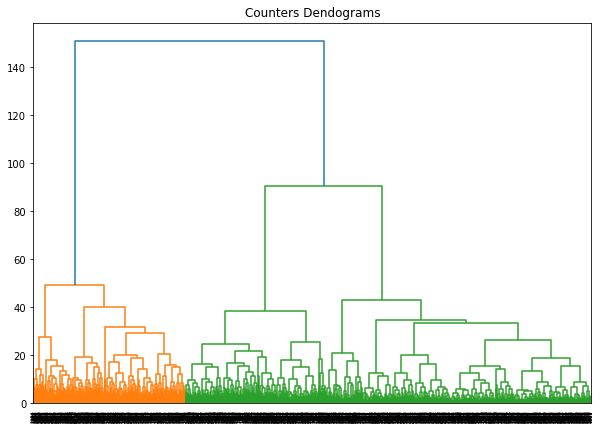

In [42]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=PCA_df , method='ward',metric='euclidean'))

In [43]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(PCA_df)
labels_PCA_H = model.labels_
values, counts = np.unique(labels_PCA_H, return_counts=True)
print(values)
print(counts)

[0 1 2]
[ 603 1050  559]


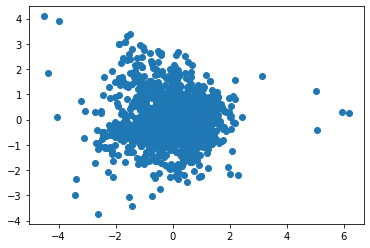

In [44]:
F1 = 'PCA7'
F2 = 'PCA10'
X = PCA_df[[F1,F2]]
plt.scatter(X[F1], X[F2])

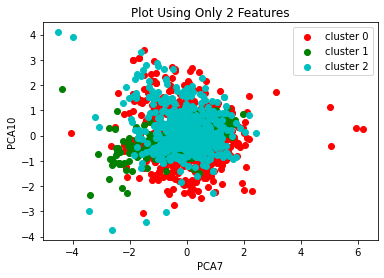

In [45]:
plot_Clusters(X,F1,F2,labels_PCA_H,True)

In [46]:
ss_PCA_H =silhouette_score(PCA_df, labels_PCA_H)
With_PCA_SS={}
With_PCA_SS['Hierarchical'] = ss_PCA_H
print(f'Silhouette_Score Of Hierarchical : {ss_PCA_H}')

Silhouette_Score Of Hierarchical : 0.20683258030549279


## Kmeans

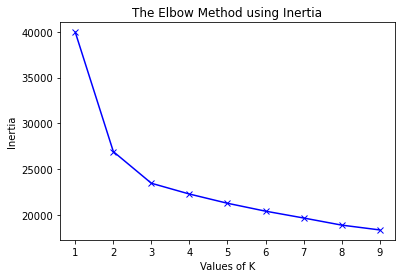

In [47]:
plot_elbow(PCA_df)

In [48]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCA_df)
values, counts = np.unique(kmeans.labels_, return_counts=True)
print(values)
print(counts)

[0 1 2]
[ 525 1087  600]


In [49]:
ss_PCA_kmeans =silhouette_score(PCA_df, kmeans.labels_)
print(f'Silhouette_Score Of Kmeans : {ss_PCA_kmeans}')
With_PCA_SS['Kmeans'] = ss_PCA_kmeans


Silhouette_Score Of Kmeans : 0.24064943001113315


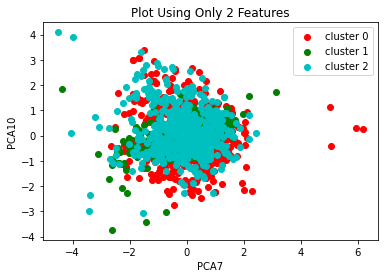

In [50]:
plot_Clusters(X,F1,F2,kmeans.labels_,True)

## GMM

In [51]:
gm = GaussianMixture(n_components=3, random_state=0).fit(PCA_df)
gm_labels = gm.predict(PCA_df)
values, counts = np.unique(gm_labels, return_counts=True)
print(values)
print(counts)

[0 1 2]
[829 774 609]


Silhouette_Score Of GMM : 0.13186225701478257


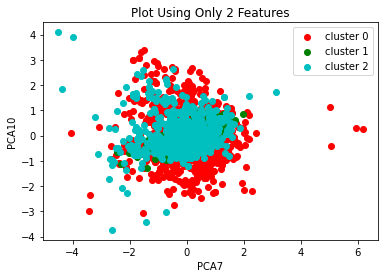

In [52]:
ss_PCA_df_gmm =silhouette_score(PCA_df, gm_labels)
print(f'Silhouette_Score Of GMM : {ss_PCA_df_gmm}')
With_PCA_SS['GMM'] = ss_PCA_df_gmm
plot_Clusters(PCA_df,F1,F2,gm_labels,True)

In [53]:
# dbscan and plot
ss_dict={}
for n in np.arange(0.25,12,0.25):
    clustering = DBSCAN(eps=n, min_samples=6).fit(PCA_df)
    labels_db = clustering.labels_
    if(len(set(labels_db))>2):
        ss =silhouette_score(PCA_df, labels_db)
        ss_dict[n]=ss

In [54]:
ss_dict

{0.75: -0.23550174303538193,
 1.0: -0.09952550471336404,
 1.25: -0.1078539639367972,
 1.5: 0.03684454651423367,
 1.75: 0.03615290946465005,
 2.25: 0.16349855879819092,
 2.75: 0.1334967220596524,
 3.0: 0.26645497835569093}

In [55]:
clustering = DBSCAN(eps=3, min_samples=6).fit(PCA_df)
labels_db = clustering.labels_
values, counts = np.unique(labels_db, return_counts=True)
print(values)
print(counts)
ss_PCA_dbscan =silhouette_score(PCA_df, labels_db)
print(f'Silhouette_Score Of DBSCAN : {ss_PCA_dbscan}')

[-1  0  1]
[ 199 2008    5]
Silhouette_Score Of DBSCAN : 0.26645497835569093


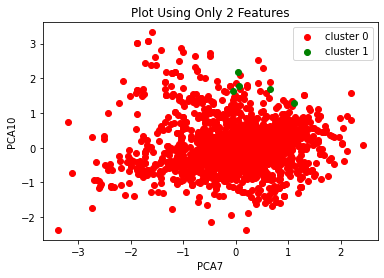

In [56]:
plot_Clusters(X,F1,F2,labels_db,True)

In [57]:
With_PCA_SS

{'Hierarchical': 0.20683258030549279,
 'Kmeans': 0.24064943001113315,
 'GMM': 0.13186225701478257}